In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [6]:
dataset_path="Retail Dataset/Mall_Customers.csv"
df=pd.read_csv(dataset_path)
X=df[['Annual Income (k$)','Spending Score (1-100)']]
scalar=StandardScaler()
X_scaled=scalar.fit_transform(X)

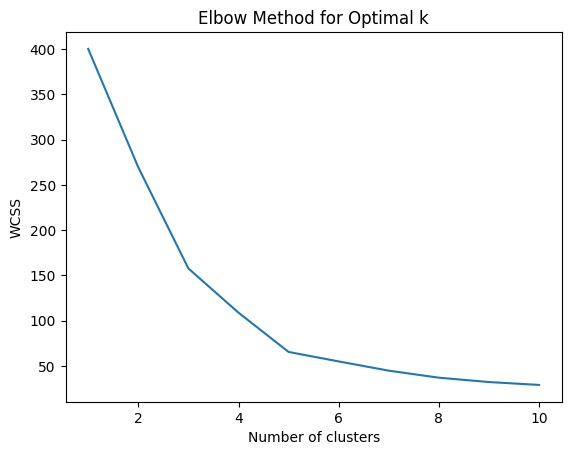

In [7]:
#Elbow method
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,max_iter=300,init="k-means++",n_init=10,random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  
plt.show()

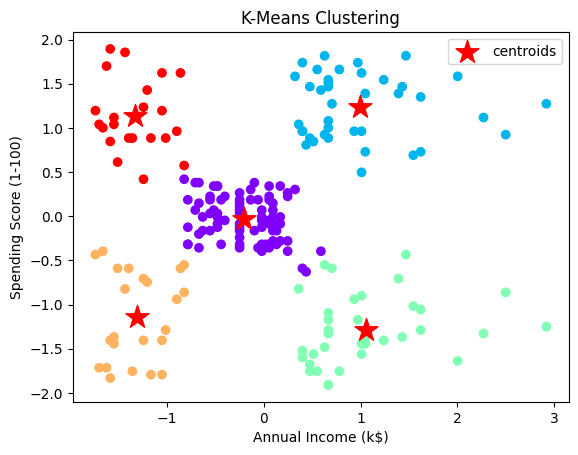

In [8]:
from cProfile import label


optimal_k=5
kmeans=KMeans(n_clusters=optimal_k,init="k-means++",max_iter=300,n_init=10,random_state=0)
kmeans.fit(X_scaled)
df['Clusters']=kmeans.labels_

plt.scatter(X_scaled[:,0],X_scaled[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='red',marker='*',label='centroids')
plt.title('K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()